In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes iris dataset with different features.

# Step 1 - Explore The Dataset
Let's start by exploring the dataset. First load the data file:

In [2]:
iris = pd.read_csv('iris-data.csv')

### Explore the data from an bird's-eye view.
You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

What the dataset looks like?
What are the data types?
Which columns contain the features of the iris?

In [3]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A3A9029688>,
      dtype=object)

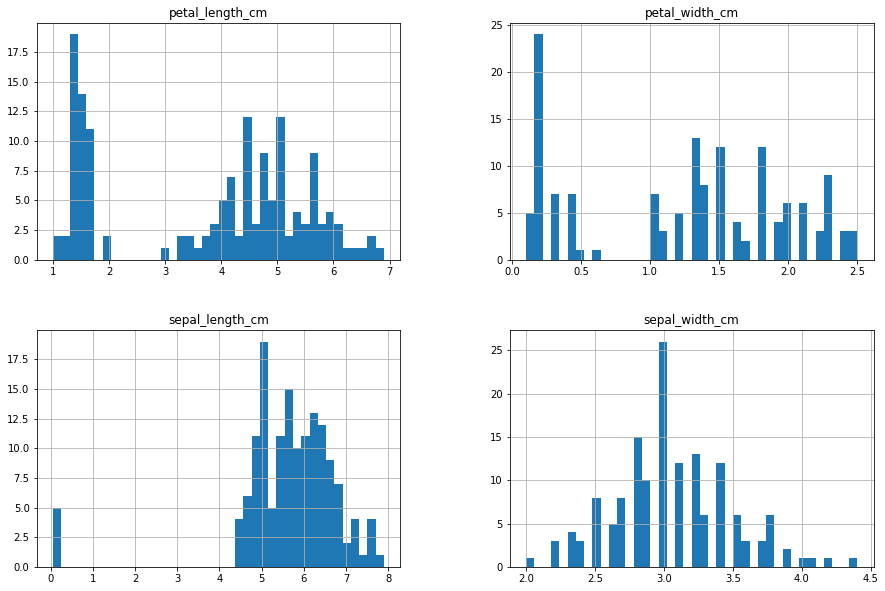

In [6]:
#check whether the data set make sense
iris.hist(bins=40, figsize=(15,10))

In [7]:
#The  petal and sepal length are skewed towards right side and some how there are less values between 1-3

# Step 2 Evaluate if the columns in this dataset are strongly correlated.
Create a correlation matrix using the numeric columns in the dataset.

Create a heatmap using seaborn to visualize which columns have high collinearity.

Comment on which columns you might need to remove due to high collinearity.

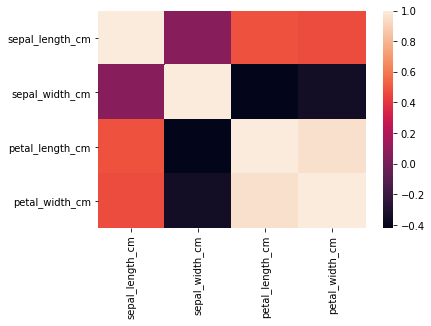

In [8]:
# code here
import seaborn as sns
corr = iris.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [9]:
#Comments : The collinearity make total sense as the petal length is correlated with
#petal width and same goes for sepal


# Step3 - Handle Missing Values
The next step would be handling missing values. We start by examining the number of missing values in each column.

In [10]:
# code here
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [11]:
missing_values = iris[iris.isnull().any(axis=1)]
missing_values

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [12]:
#you see that the petal width is missing for class Iris-setosa, so may be find out the unique class

In [13]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [14]:
#There is just three class, the data entry for setoa has been mispelles into setossa
#and the versicolor is same as iris versicolor so we need the input vaue 

In [15]:
iris["class"][iris["class"] == "Iris-setossa"] = 'Iris-setosa'
iris["class"][iris["class"] == "versicolor"] = 'Iris-versicolor'

C:\Users\sudis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sudis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#check the unique value again
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
#Check the null value again
missing_values = iris[iris.isnull().any(axis=1)]
missing_values

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [18]:
#with just the five row values missing we can drop the data and it will not affect much

In [19]:
# Your code here
iris.dropna(inplace = True)

In [20]:
# Your code here
#Check the null value again
missing_values = iris[iris.isnull().any(axis=1)]
missing_values

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [30]:
#Replacing Outliers with Median Values
print(iris['sepal_length_cm'].quantile(0.50)) 
print(iris['sepal_length_cm'].quantile(0.25)) 
iris['sepal_length_cm'] = np.where(iris['sepal_length_cm'] < 5.1, 5.8, iris['sepal_length_cm'])
iris.describe()

5.8
5.1


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.965517,3.046207,3.836552,1.236552
std,0.501162,0.435096,1.742955,0.755058
min,5.100000,2.000000,1.000000,0.100000
25%,5.700000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.300000,3.300000,5.100000,1.800000
max,7.200000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A3AC5D20C8>,
      dtype=object)

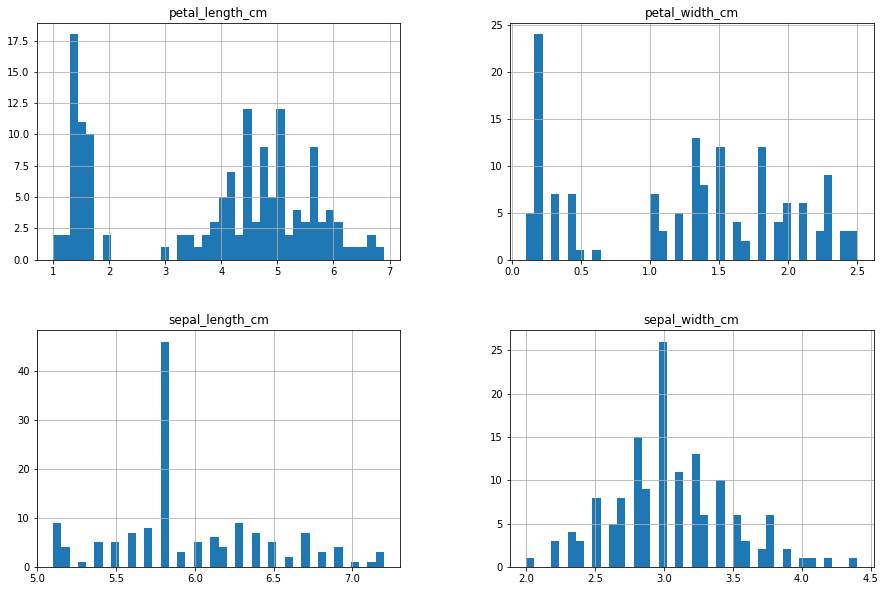

In [31]:
#check the histogram
iris.hist(bins=40, figsize=(15,10))

In [ ]:
q_low = iris["sepal_length_cm"].quantile(0.01)
q_hi  = iris["sepal_length_cm"].quantile(0.99)

iris_filtered = iris[(iris["sepal_length_cm"] < q_hi) & (iris["sepal_length_cm"] > q_low)]
iris_filtered